<table ><tr><td valign='center' bgcolor='white'>
  <a href="https://web.facebook.com/DAT.KUSRC/" target="_blank"><img src="https://drive.google.com/uc?id=1dNBiKikzW1-osi6lleLOgSOKQ65IIfMC" height="50px"></a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
</td><td valign='center' bgcolor='white'>
  <a href="https://www.ku.ac.th/" target="_blank"><img src="https://drive.google.com/uc?id=1ZfGOBmxAwg8SAhyseFziyinzxBGme78a" height="80px"></a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
</td><td valign='center' bgcolor='white'>
<a href="https://www.tensorflow.org/" target="_blank"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/1200px-TensorFlowLogo.svg.png" height="80px"></a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
</td><td valign='center' bgcolor='white'>
  <a href="https://mike.cpe.ku.ac.th/" target="_blank"><img src="https://drive.google.com/uc?id=1s6r3iG_Slpu_NSWqdt5zBp8Z9hV0-zh6" height="50px"></a>
</td></tr></table>

---

<center><h1><b>Basic Computer Vision with Machine Learning</b></h1></center>

---
*   Acknowledgement: Most parts of this tutorail were extracted from [Machine Learning, Zero to Hero](https://www.youtube.com/watch?v=bemDFpNooA8), Google TensorFlow 2019.

In [8]:
print('Basic Computer Vision with Machine Learning..')
print('  Brought to you by K.Toto@MikeLab.Net')

Basic Computer Vision with Machine Learning..
  Brought to you by K.Toto@MikeLab.Net


## 1. How to recognize different objects?
---

For example, look at these pictures, 'How many <font color=ff00ff>shoes</font> do we see?'

<br>
<center><img src=https://drive.google.com/uc?id=1N_fAN0zbL7nK1Y9QAYIWBcMmW2CuGQ4q></center>

We might say two, right? But <font color=ff00ff>***how***</font> do we know that they are <font color=ff00ff>shoes</font>?

Imagine that if somebody <font color=ff00ff>had never seen shoes before</font >! How would we tell them that despite the great difference between the <font color=00ffff>high heel</font> and the <font color=ffff00>sport</font> shoes, they are still both shoes. 

Maybe we would think that if it's <font color=f72e03>**red**</font>, it's a shoe. Because all we've seen are these two shoes, and they're both <font color=f72e03>red</font>. 

But, of course, it's <font color=ffff00>not</font> that simple. But how do we know that these two are <font color=ff00ff>shoes</font>?

Because, in our life, <font color=ff00ff>we've seen lots of shoes</font>, and <font color=ff00ff>we have learned to understand</font> what makes a shoe a shoe. 

<br>
<center><img src=https://drive.google.com/uc?id=1mRV8KBvFAdCkL8aGEf178wB-Boa8cozz></center>

So, it follows logically that if we <font color=ff00ff>show to a computer lots of shoes</font>, it <font color=00ffff>will be able to recognize</font> what a shoe is. And that's where the dataset called <font color=ffff>**Fashion MNIST**</font> is useful.

<br>
<center><img src=https://drive.google.com/uc?id=1_Lu5MdmnHJp-3I33njzxJRCB1USNkkym></center>

This dataset has 70,000 images in 10 different categories. So, there's 7,000 examples of each category, including shoes. Hopefully that seeing 7,000 shoes is <font color=00ffff>enough</font> for a computer to learn what a shoe looks like. 

The images in Fashion MNIST are only 28x28 pixels. So, they are pretty small. And the less data used, the faster it is for a computer to process it. 



<center><img src=https://drive.google.com/uc?id=12nSU-AutucBvyHF093s1yM1jiWz4CC0j></center>

That being said, they still lead to recognize items of clothing. In this case you can still see that it's a shoe.

## 2. The code explained
---

Now we will see the code that teach us how to train a computer to recognize items of clothing based on a training data.

The type of code we will write is almost identical to what we did in the last tutorial. That's part of the power of <font color=ffff00>**TensorFlow**</font> that allows us to design neural network for a variety of tasks with a <font color=ff00ff>consistent</font> <font color=00ffff>programming API</font>.


We start by loading the data. The fashion MNIST dataset is <font color=ff00ff>built into</font> <font color=ffff00>TensorFlow</font>, so it is easy to load it with the code look like this.

In [ ]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print('Done..')

The <font color=ff00ff>training images</font> is a set of 60,000 images, like our <font color=ffff00>*ankle boot*</font> here. The other 10,000 are a <font color=ff00ff>test set</font> that we can use to check to see how well our neural network performs.

<br>
<center><img src=https://drive.google.com/uc?id=1cP8vLir6VUsGX3CELBKjrdDSqNgzbjbV></center>

The <font color=ffff00>**label**</font> is a number indicating the class of that type of clothing. So, in this case, the number <font color=ffff00>09</font> indicated an <font color=ffff00>ankle boot</font>. Why do we think it would be a number and not just the text, <font color=ffff00>'**ankle boot**'</font>? 

There're two main reasons: first computer <font color=ff00ff>deals better</font> with <font color=00ff00>numbers</font>; but perhaps more importantly, there's the issue with bias. if we label it as <font color=ffff00>'**ankle boot**'</font>, we're already showing a <font color=00ffff>bias</font> towards the English language. So, by using a number, we can point to a text description in any language as shown in the above picture.

When looking at the neural network design, it's always good to explore the <font color=ff00ff>*input*</font> values and the <font color=ff00ff>*output*</font> values first.

<br>
<center><img src=https://drive.google.com/uc?id=1KX_oNlGn6gfygVE9KQf-QmhAr6ULKck8></center>

Here we can see that our neural network is a little <font color=ff00ff>more complex</font> than the one we have seen before. Our <font color=00ffff>first</font> layer has the input of shape 28x28, which was the size of the image. Our <font color=00ffff>last</font> layer is 10, which is the number of different items of clothing represented in our dataset.

Our neural network will be a kind of act like a <font color=ffff00>**filter**</font>, which takes in 28x28 set of pixels and outputs 1 of 10 values.

So what's about this number, <font color=00ffff>*128*</font>? What does that do?
<br>
<center><img src=https://drive.google.com/uc?id=1fQwd1JWqX2FouEY2Z-Vuf0s_iSxGRIyI></center>

<br>
<center><img src=https://drive.google.com/uc?id=1btOZmXxqv4OcIHc5fVHoImRBalyZC93k></center>

Think of it like this, we're going to have 128 <font color=ff00ff>functions</font> (or <font color=00ffff>filters</font>), each one of which has <font color=00ffff>parameters inside</font> of it. Let's call these <font color=00ffff>**f0**</font> through <font color=00ffff>**f127**</font>. What we want is that when the pixels of the shoes get fed into them, one by one, that the combination of all of these functions will <font color=ff00ff>output</font> the <font color=ffff00>correct</font> value, in this case, the number <font color=00ffff>**9**</font>.

In order to do that, the computer will need to <font color=00ff00>figure out</font> the <font color=ffff00>parameters</font> <font color=ff00ff>inside of these functions</font> to get that result. And it will then <font color=ff00ff>extend</font> this to all of the other items of clothing in the dataset. The logic is, once it has done this, then it <font color=ff00ff>should be able to</font> recognize items of clothing.

<br>
<center><img src=https://drive.google.com/uc?id=15-Lfo0b9sjosn0gGJmepbi-NxMtH4ZWa></center>

For the <font color=00ffff>loss function</font>, and the <font color=ffff00>optimizer function</font>, the neural network will be first initialized with <font color=00ff00>random</font> values. 

The <font color=00ffff>**loss**</font> function will then measure how good or how bad the results were. And then with the <font color=ffff00>**optimizer**</font>, it will generate new parameters for the functions to see if it can do better.

<br>
<center><img src=https://drive.google.com/uc?id=183NI_5XXu3kDe8bhG8ZfvirOiwNa68cW></center>

For the <font color=ff00ff>**activation** functions</font>, the first one is on the layer of 128 functions, and it's called <font color=ffff00>**relu**</font>, or <font color=ffff00>rectified linear unit</font>. What it really does is as simple as returning a value if it's greater than zero. So if that function has zero or less as output, it just gets <font color=ff00ff>***filtered*** out</font>.

<br>
<center><img src=https://drive.google.com/uc?id=1iVpijNCvrWxvYMIebWR760ZgUY9t2skd></center>

The <font color=ffff00>**softmax**</font> has the effect of <font color=ff00ff>picking</font> the biggest number in a set. The output layer in this neural network has 10 items in it representing the <font color=ffff00>probability</font> that we are looking at the specific item of clothing. So, in this case, it has a high probability that it is the item <font color=00ffff>09</font>, which is our ankle boot. So, instead of searching through to find the largest, what <font color=ffff00>*softmax*</font> does is, it sets it to 1 and the rest to 0. So, all we have to do is to find the 1.


<br>
<center><img src=https://drive.google.com/uc?id=1BJQFwaoJRGUUr_C1uqTndVSJzXJjxJRQ></center>

<font color=ff00ff>Training</font> the model is quite simple, we just <font color=ffff00>fit</font> the <font color=ffff00>training images</font> to the <font color=ffff00>training lables</font>. This time, we'll try it for just 5 epochs. 

Remember earlier that we had 10,000 images and labels that we didn't train with? These are images that the model hasn't previously seen, so we can use them to test how well our model performs. We can do that test by passing them to the <font color=00ffff>`evaluate( )`</font> method like that seen the above picture.

And then, finally, we can get predictions back for new images, by calling <font color=00ffff>`model.predict( )`</font>.


### Drawback of Raw Data Processing


Having gone through this, we'll probably seen one drawback, and that's the fact that the images are always 28x28 grayscale with the <font color=ff00ff>item of clothing</font> <font color=ffff00>centered</font>.

So, for what if it's just a normal photograph, and we want to recognize its contents, and we don't have the luxury of it being the only thing in the picture, as well as being centered?

That's where the process of <font color=ffff00>**spotting features**</font> become useful, and the tool of <font color=00ff00>**convolutional neural**</font> network is our friend. We will see all about that in the next part.

## 3. Runing the code

Reference: https://www.tensorflow.org/tutorials/keras/classification


### Load the fashion MNIST dataset

In [9]:
# run this code block again, and examine what train_images and train_lables
# looks like, if you have not done it yet?
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print('Done..')

Done..


In [10]:
type(train_images)

numpy.ndarray

In [11]:
train_images.shape #60000 ภาพ 28x28 pixel

(60000, 28, 28)

In [12]:
test_images.shape

(10000, 28, 28)

In [13]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [14]:
train_labels[0]

9

In [15]:
test_labels[0]

9

### Preprocess the data

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255.

In [16]:
train_images = train_images / 255.0

test_images = test_images / 255.0

print('Done..')

Done..


In [17]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Plot the data

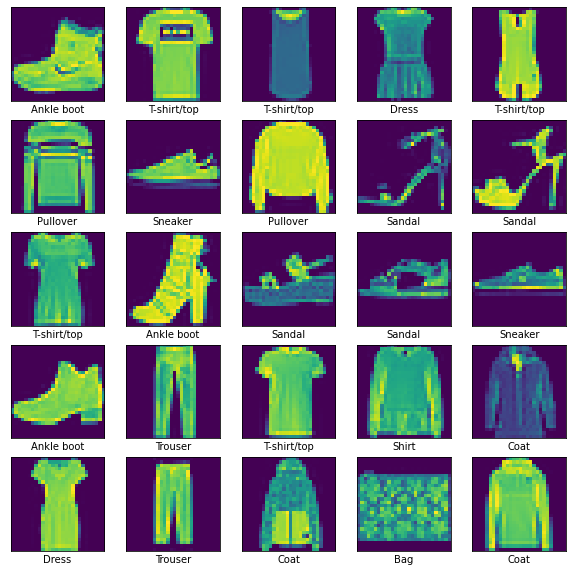

In [18]:
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  # plt.imshow(test_images[i])
  plt.xlabel(class_names[train_labels[i]])
plt.show()

### Build the model

In [20]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer=tf.compat.v1.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

print('Done..')

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4967 - accuracy: 0.8255
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3745 - accuracy: 0.8657
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3339 - accuracy: 0.8778
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3103 - accuracy: 0.8854
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2915 - accuracy: 0.8931
Done..


### Evaluate the accuracy

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nTest accuracy: {test_acc*100:.2f}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.3750 - accuracy: 0.8670

Test accuracy: 86.70%


### Make the predictions

In [22]:
predictions = model.predict(test_images)

In [23]:
predictions[0]

array([1.08958338e-05, 2.44835337e-06, 5.48965772e-06, 1.13304786e-07,
       4.59717739e-06, 6.42142594e-01, 6.54392807e-06, 4.95502353e-02,
       4.16917101e-05, 3.08235407e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's <font color=ff00ff>confidence</font> that the image corresponds to each of the 10 different articles of clothing.

In [24]:
predictions[0]

array([1.08958338e-05, 2.44835337e-06, 5.48965772e-06, 1.13304786e-07,
       4.59717739e-06, 6.42142594e-01, 6.54392807e-06, 4.95502353e-02,
       4.16917101e-05, 3.08235407e-01], dtype=float32)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'cyan'
  else:
    color = 'orange'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

print('Done..')

Done..


Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

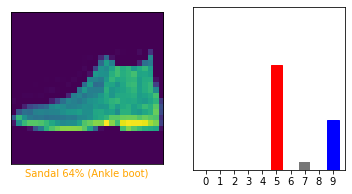

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

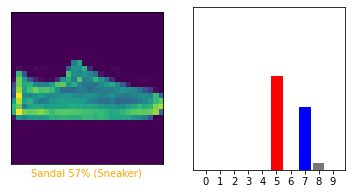

In [27]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

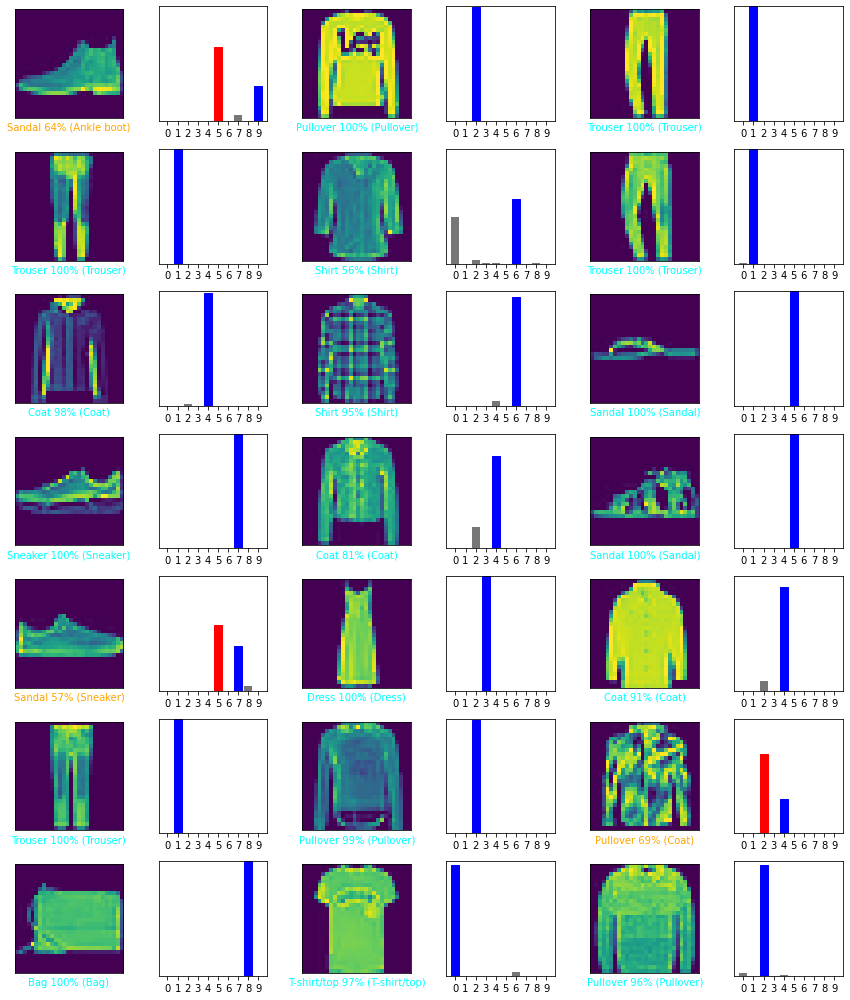

In [28]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 7
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Bonus Topic

How to stop training if we reach the required accuracy?

In each of the cases so far, we’ve hardcoded the number of epochs we’re training for.

While that works, we might want to train until we reach the desired accuracy instead of constantly trying different numbers of epochs and training and retraining until we get to our desired value. 

So, for example, if we want to train until the model is at 95% accuracy on the training set, without knowing how many epochs that will take, how could we do that?

The easiest approach is to use a callback on the training. Let’s take a look at the updated code that uses callbacks:

In [29]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images=training_images/255.0
test_images=test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),\
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),\
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',\
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nTest accuracy: {test_acc*100:.2f}%')

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4718 - accuracy: 0.8300
Epoch 2/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3581 - accuracy: 0.8696
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3209 - accuracy: 0.8827
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2960 - accuracy: 0.8900
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2808 - accuracy: 0.8951
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2661 - accuracy: 0.9015
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2518 - accuracy: 0.9055
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2422 - accuracy: 0.9093
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2316 - accuracy: 0.9130
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.220



---



##4. Your exercise

Complete the following code block for image classification problem with the old MNIST dataset.

<center><img src=https://miro.medium.com/max/1650/1*XdCMCaHPt-pqtEibUfAnNw.png width="520px">
<br>
MNIST Dataset and Number Classification <sup><a href=https://www.katacoda.com/basiafusinska/courses/tensorflow-getting-started/tensorflow-mnist-beginner>[1]<a></sup></center>

#### <font color=#FFA500>Hint
* Go back to the previous topic and well understand it first!</font>

###Downloading the MNIST data

The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

In [1]:
import tensorflow as tf
(train_images, train_labels), (test_images, test_labels) = \
    tf.keras.datasets.mnist.load_data()
print('Done')

Done


The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students <sup><a href=https://en.wikipedia.org/wiki/MNIST_database target=_blank>[2]</a></sup>.

train_images and test_images parts contain greyscale RGB codes (from 0 to 255) while train_labels and test_labels parts contains labels from 0 to 9 which represents which number they actually are. 

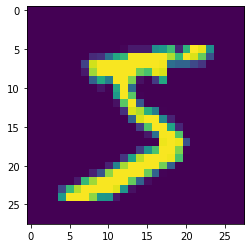

In [4]:
# your code to explore the data here
# train_images.shape
# train_images[0]
# train_labels[0]
plt.imshow(train_images[0])
#plt.show()

In [5]:
type(train_images)

numpy.ndarray

To visualize these numbers, we can get help from matplotlib.

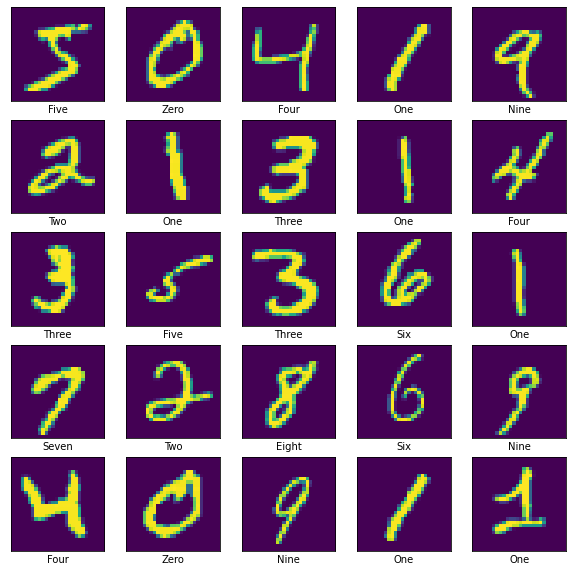

In [6]:
# your code here
import matplotlib.pyplot as plt

class_names = ['Zero', 'One', 'Two', 'Three', 'Four',
               'Five', 'Six', 'Seven', 'Eight', 'Nine'] 

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
# plt.imshow(test_images[i])
  plt.xlabel(class_names[train_labels[i]])
# plt.xlabel(class_names[test_labels[i]])
plt.show()

###Normalizing the images

We normalize our data as it is always required in neural network models. We can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code). This can be done with the following code:

In [7]:
# Normalizing the RGB codes by dividing it to the max RGB value.
# your code here
train_images=train_images /255.
test_images = test_images / 255.
print('train_images shape:', train_images.shape)
print('Number of images in train_images', train_images.shape[0])
print('Number of images in test_images', test_images.shape[0])

train_images shape: (60000, 28, 28)
Number of images in train_images 60000
Number of images in test_images 10000


In [8]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

###Building, compiling and fitting the model

In [9]:
import tensorflow as tf
# your code here
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),\
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),\
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',\
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=50, callbacks=[callbacks])

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nTest accuracy: {test_acc*100:.2f}%')

Epoch 1/50
1869/1875 [============================>.] - ETA: 0s - loss: 0.2623 - accuracy: 0.9253
Reached 95% accuracy so cancelling training!
313/313 [==============================] - 1s 2ms/step - loss: 0.1411 - accuracy: 0.9580

Test accuracy: 95.80%


###Evaluating the model

In [10]:
# your code here
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nTest accuracy: {test_acc*100:.2f}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.1411 - accuracy: 0.9580

Test accuracy: 95.80%


###Making the prediction

In [11]:
predictions = model.predict(test_images)

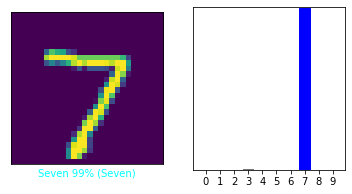

Done..


In [15]:
# modify the above plot_image() and plot_value_array we have already seen here

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()
print('Done..')

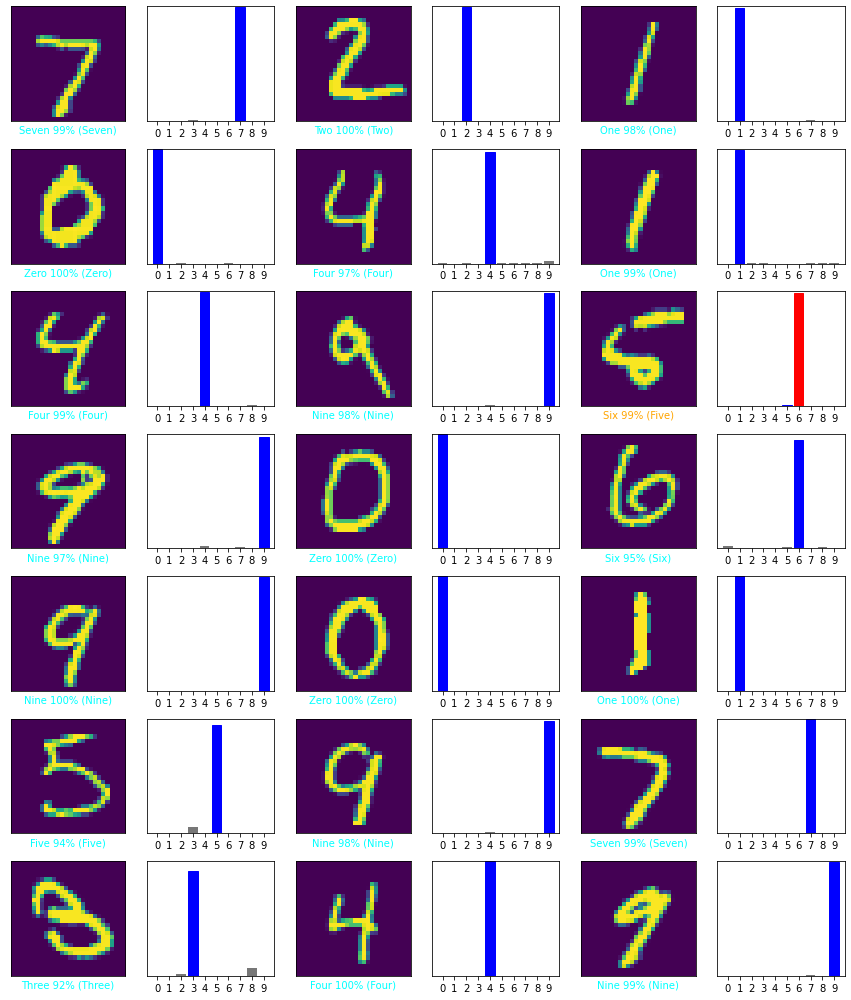

In [16]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 7
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()